In [1]:
#import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter

# Read File

In [2]:
file = open('trending.json', encoding="utf8")

# Parse JSON
data = json.load(file)

# Close file
file.close()

# Show amount of objects
len(data['collector'])
# This will split the objects to separate columns and store everything as a DataFrame
df = pd.json_normalize(data['collector'])

In [3]:
# Change the format of the datetime 

df['createTime']=[time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(i)) for i in df['createTime']]

# Plot 1: Trending Background Music type on Tik Tok

## Data Pre-processing

In [4]:
music_df = pd.read_csv('audd_music.csv')
apple_df = pd.read_csv('audd_music_apple_music.csv')

In [5]:
music_df = music_df.dropna(subset=['apple_music.isrc'])

In [6]:
music_df.rename(columns={'apple_music.isrc':'isrc'}, inplace=True)

In [7]:
apple_df = apple_df.drop_duplicates(subset='isrc')
music_df = music_df.drop_duplicates(subset='isrc')

In [8]:
merge_df = music_df.merge(apple_df,how='left', left_on='isrc', right_on='isrc')

In [9]:
id_list = merge_df['id'].tolist()

In [10]:
df.rename(columns={'musicMeta.musicId':'musicId','authorMeta.verified':'verified','videoMeta.duration':'duration'}, inplace=True)

In [11]:
df['musicId'] = df["musicId"].astype(str).astype(int)
type_df = df[df['musicId'].isin(id_list)]

In [12]:
type_df = type_df.sort_values(by=['diggCount'],ascending=False)
type_df1= type_df.iloc[0:47]
type_df2 =type_df.iloc[47:,]

In [13]:
music_list1 = type_df1['musicId'].tolist()
music_list2 = type_df2['musicId'].tolist()
d1 = Counter(music_list1)
times_df1 = pd.DataFrame.from_dict(d1, orient='index').reset_index()
times_df1 = times_df1.rename(columns={'index':'id', 0 :"count"})
d2 = Counter(music_list2)
times_df2 = pd.DataFrame.from_dict(d2, orient='index').reset_index()
times_df2 = times_df2.rename(columns={'index':'id', 0 :"count"})

In [14]:
temp_df = merge_df[['id','genreNames']]
genre = temp_df['genreNames']
genre_list = genre.tolist()

new_list = []
for genre in genre_list:
    temp = genre.split(',')
    temp_ = temp[0]
    temp_ = temp_.replace("[",'')
    temp_ = temp_.replace("'",'')
    temp_ = temp_.replace('"','')
    new_list.append(temp_)

In [15]:
temp_df['genreNames'] = new_list

/var/folders/ck/0nyny8717t5czn1604zh9l2c0000gn/T/ipykernel_48191/3039910000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['genreNames'] = new_list


In [16]:
above_df = pd.merge(times_df1,temp_df) # above the mean of DiggCounts
below_df = pd.merge(times_df2,temp_df) # below the mean of DiggCounts

In [17]:
# get the counts of each type of music in above_dataframe
c_pop = 0
c_hp = 0
c_dan = 0
c_alt = 0
c_ele = 0
c_others =0

for index, row in above_df.iterrows():
    if row['genreNames'] == 'Pop':
        c_pop = c_pop + row['count']
    elif row['genreNames'] == 'Hip-Hop/Rap':
        c_hp = c_hp + row['count']
    elif row['genreNames'] == 'Dance':
        c_dan = c_dan + row['count']
    elif row['genreNames'] == 'Alternative':
        c_alt = c_alt + row['count']
    elif row['genreNames'] == 'Electronic':
        c_ele = c_ele + row['count']
    else: 
        c_others = c_others + row['count']

print(c_pop,c_hp,c_dan,c_alt,c_ele,c_others)
        

13 8 5 3 4 14


In [18]:
# get the counts of each type of music in below_dataframe
c_pop_ = 0
c_hp_ = 0
c_dan_ = 0
c_alt_ = 0
c_ele_ = 0
c_others_ =0

for index, row in below_df.iterrows():
    if row['genreNames'] == 'Pop':
        c_pop_ = c_pop_ + row['count']
    elif row['genreNames'] == 'Hip-Hop/Rap':
        c_hp_ = c_hp_ + row['count']
    elif row['genreNames'] == 'Dance':
        c_dan_ = c_dan_ + row['count']
    elif row['genreNames'] == 'Alternative':
        c_alt_ = c_alt_ + row['count']
    elif row['genreNames'] == 'Electronic':
        c_ele_ = c_ele_ + row['count']
    else: 
        c_others_ = c_others_ + row['count']
    

print(c_pop_,c_hp_,c_dan_,c_alt_,c_ele_,c_others_)

75 76 25 13 8 98


In [19]:
n1 = len(type_df1)
n2 = len(type_df2)

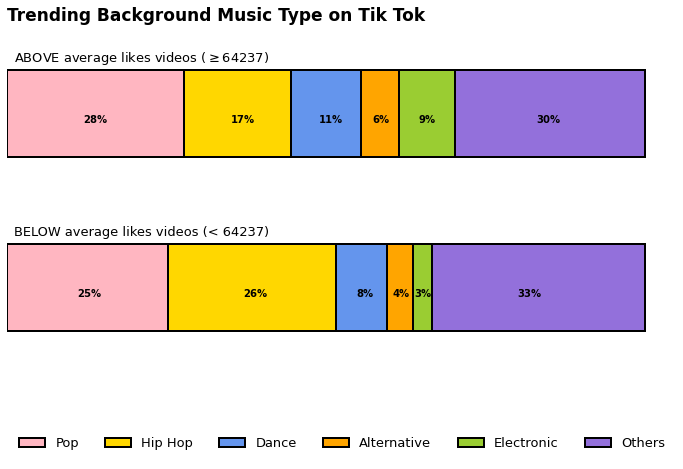

In [20]:
import matplotlib as mpl

color=['lightpink', 'gold','cornflowerblue','orange','yellowgreen','mediumpurple']

pop = [round(c_pop_/n2,2), round(c_pop/n1,2)]
hp = [round(c_hp_/n2,2), round(c_hp/n1,2)]
dan = [round(c_dan_/n2,2),round(c_dan/n1,2)]
alt = [round(c_alt_/n2,2), round(c_alt/n1,2)]
ele = [round(c_ele_/n2,2), round(c_ele/n1,2)]
others = [round(c_others_/n2,2), round(c_others/n1,2)]

plotdata = pd.DataFrame({'Pop' : pop,'Hip Hop' : hp, 'Dance' : dan,  'Alternative': alt,'Electronic': ele, 'Others': others})
ax = plotdata.div(plotdata.sum(axis=1),axis=0)*100
ax.plot(kind='barh',stacked = True, color=color,figsize=(12,8), edgecolor='black', linewidth=2)
width = 0.5

# Setting of the plot
plt.yticks([-1,0], ['',''])
plt.axis('off')

#Percentage of above
plt.text(1,1.3,'ABOVE average likes videos ($\geq$64237)', fontsize=13)
plt.text(12,0.95,'28%', fontweight='semibold')
plt.text(35,0.95,'17%', fontweight='semibold')
plt.text(48.9,0.95,'11%', fontweight='semibold')
plt.text(57.3,0.95,'6%', fontweight='semibold')
plt.text(64.5,0.95,'9%', fontweight='semibold')
plt.text(83,0.95,'30%', fontweight='semibold')

#Percentage of below
plt.text(1,0.3,'BELOW average likes videos (< 64237)', fontsize=13)
plt.text(11,-0.05,'25%',fontweight='semibold' )
plt.text(37,-0.05,'26%',fontweight='semibold')
plt.text(54.8,-0.05,'8%', fontweight='semibold')
plt.text(60.4,-0.05,'4%', fontweight='semibold')
plt.text(63.9,-0.05,'3%', fontweight='semibold')
plt.text(80,-0.05,'33%', fontweight='semibold')

plt.legend(loc = 'lower left', ncol=6,frameon=False, fontsize=13)
plt.title('Trending Background Music Type on Tik Tok',loc='left', fontsize=17, fontweight='bold' )

plt.show()

# Plot 2: Trending Videos Duration on Tik Tok

In [21]:
spread_df = df[['playCount','diggCount','shareCount','commentCount','duration']]

In [22]:
top_list =[]
for index, row in spread_df.iterrows():
    if row['shareCount'] > 1905 and row['playCount'] > 1029212:
        top_list.append(index)

top_df = spread_df.iloc[top_list]

In [23]:
s1 = []
p1 = []
s2 = []
p2 = []


for index, row in spread_df.iterrows():
    if row['duration'] < 20:
        s1.append(row['shareCount'])
        p1.append(row['playCount'])
    else: 
        s2.append(row['shareCount'])
        p2.append(row['playCount'])

/var/folders/ck/0nyny8717t5czn1604zh9l2c0000gn/T/ipykernel_48191/484212034.py:17: RuntimeWarning: divide by zero encountered in log
  s1_log = np.log(s1)
/var/folders/ck/0nyny8717t5czn1604zh9l2c0000gn/T/ipykernel_48191/484212034.py:19: RuntimeWarning: divide by zero encountered in log
  s2_log = np.log(s2)


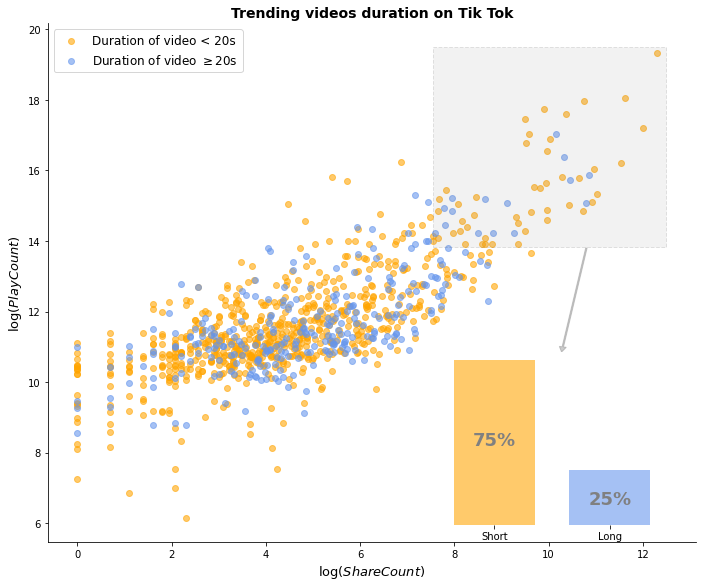

In [24]:
s1_ = []
p1_ = []
s2_ = []
p2_ = []


for index, row in top_df.iterrows():
    if row['duration'] < 20:
        s1_.append(row['shareCount'])
        p1_.append(row['playCount'])
    else: 
        s2_.append(row['shareCount'])
        p2_.append(row['playCount'])
        
# log-log: shareCount_playCount

s1_log = np.log(s1)
p1_log = np.log(p1)
s2_log = np.log(s2)
p2_log = np.log(p2)

# creating the figure
fig = plt.figure(figsize=(10, 8))
left,bottom, width, heigh = 0.1,0.1,0.9,0.9


# populate the figure with scatter-plot
ax = fig.add_axes([left,bottom, width, heigh])

ax.scatter(s1_log,p1_log,label = 'Duration of video < 20s', c = 'orange', alpha= 0.58)
ax.scatter(s2_log,p2_log,label = 'Duration of video $\geq$20s', c='cornflowerblue',  alpha= 0.58)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize = 12, loc= 'upper left', frameon=True)
ax.set_xlabel('$\log(Share Count)$',fontsize = 13, fontweight='bold')
ax.set_ylabel('$\log(Play Count)$', fontsize = 13, fontweight='bold')
#populate the figure with bar chart
ax2 = fig.add_axes([0.65,0.13,0.3,0.3])
x = ['Short','Long']
y = [len(s1_),len(s2_)]
ax2.bar(x,y,alpha = 0.58, color=['orange', 'cornflowerblue'],width=0.7)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])

# Add annotation
ax2.annotate('75%',(0,23),ha="center",va="center",fontsize=18,color='grey',weight="bold")
ax2.annotate('25%',(1,7),ha="center",va="center",fontsize=18,color='grey',weight="bold")

# annotate arrow
ax.arrow(10.8, 13.8, -0.5, -2.8, head_width = 0.15,
         head_length = 0.15, fc ='grey', ec ='grey',width = 0.03,alpha = 0.4)

from matplotlib.patches import Rectangle
# Create a Rectangle patch
rect = Rectangle((7.55,13.84),4.95,5.66,linewidth=1,edgecolor='black',facecolor='grey', alpha = 0.1, linestyle = '--')

# Add the patch to the Axes
ax.add_patch(rect)

#Add title to the graph
ax.set_title('Trending videos duration on Tik Tok', fontsize=14, fontweight='bold')
#
ax.axis
plt.show()

# Plot 3: Peak Hours on Tik Tok

In [25]:
hour_list = []

for index, row in df.iterrows():
    hour = row['createTime'][11:13]
    hour = int(hour)
    hour_list.append(hour)

In [26]:
hour_list = np.where(hour_list == '0', '24', hour_list)

In [27]:
spread_df.loc[:,'share_ratio'] = spread_df['shareCount']/ spread_df['playCount']
spread_df.loc[:,'comment_ratio'] = spread_df['commentCount']/ spread_df['playCount']
spread_df.loc[:,'hours'] = hour_list

/Users/xiawang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [28]:
groupby_df1 = spread_df.groupby('hours')['share_ratio'].mean()
ave_list1 = groupby_df1.tolist()
groupby_df2 = spread_df.groupby('hours')['comment_ratio'].mean()
ave_list2 = groupby_df2.tolist()

In [29]:
x_list = list(range(1,25))

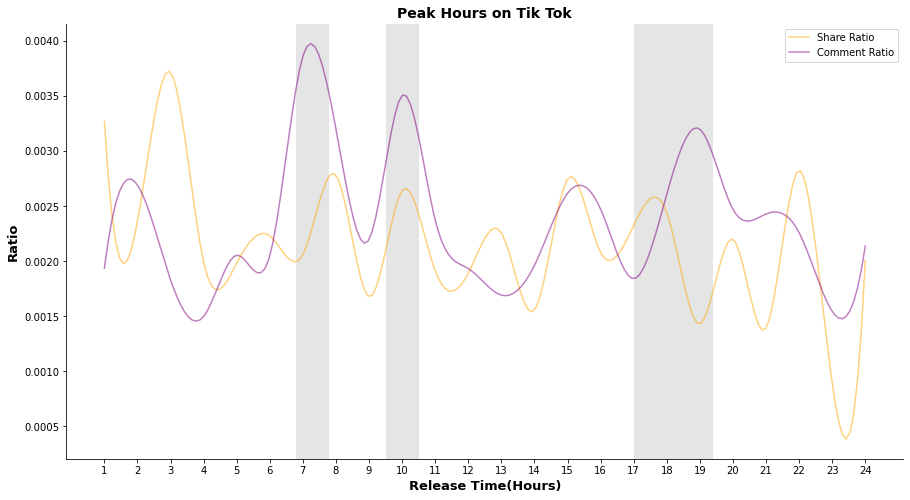

In [31]:
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib import ticker

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(111)

#smooth the fitted line
spl = make_interp_spline(x_list, ave_list1, k=3)
x_arr = np.array(x_list)
x_arr = np.linspace(x_arr.min(), x_arr.max(), 200) 
y_share = spl(x_arr)
ax.plot(x_arr, y_share,c='orange', alpha =0.5, label = 'Share Ratio')

spl = make_interp_spline(x_list, ave_list2, k=3)
y_comment = spl(x_arr)
ax.plot(x_arr, y_comment,c='purple', alpha = 0.5, label = 'Comment Ratio')


#highlight the peak hours
plt.axvspan(6.8,7.8, facecolor='grey', alpha=0.2)
plt.axvspan(9.5,10.5, facecolor='grey', alpha=0.2)
plt.axvspan(17,19.4, facecolor='grey', alpha=0.2)

#Add title to the graph
ax.set_title('Peak Hours on Tik Tok', fontsize=14, fontweight='bold')

#visualise
ax.set_xlabel('Release Time(Hours)',fontsize = 13, fontweight='bold')
ax.set_ylabel('Ratio', fontsize = 13, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(x_list)
ax.legend()

plt.show()